# G2M Cab Investment Case Study

Data sets have been provided that contain information on two cab companies. There is remarkable growth in the Cab industry and a private company in the US wants to invest. For this purpose, profit analysis and a set of recommendations  are required for choosing the better company.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno

# Loading Datasets

In [2]:
cab_data=pd.read_csv('https://raw.githubusercontent.com/ShreyaRamachandra/DataSets-for-Cab-investment/main/Cab_Data.csv')
customer_id=pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
transaction_id=pd.read_csv('https://raw.githubusercontent.com/ShreyaRamachandra/DataSets-for-Cab-investment/main/Transaction_ID.csv')
city=pd.read_csv('https://raw.githubusercontent.com/ShreyaRamachandra/DataSets-for-Cab-investment/main/City.csv')

In [3]:
cab_data.head(10) #prints top 10 data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [4]:
cab_data.info() #provides the details of the cab_data dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
cab_data.isnull().sum() #checking for null values

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [6]:
cab_data.shape #ensuring whether data contains unique values

(359392, 7)

<AxesSubplot:>

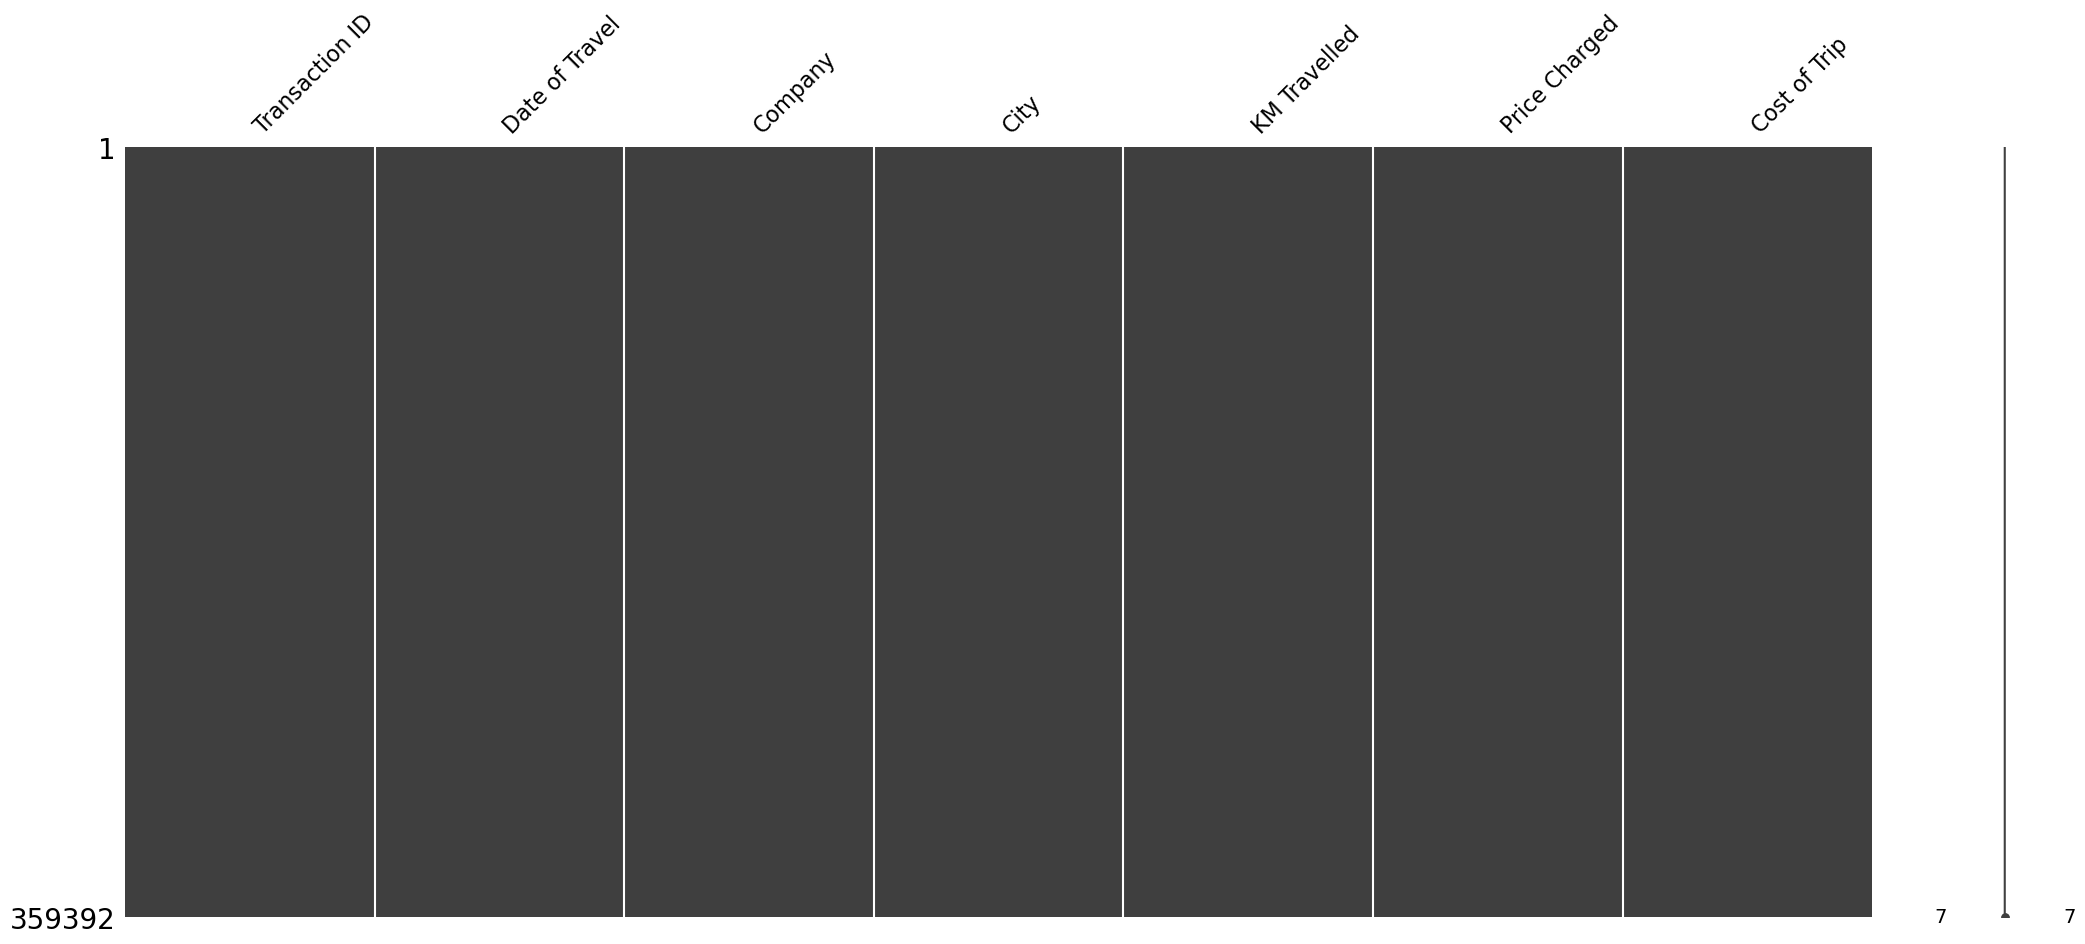

In [7]:
missingno.matrix(cab_data) #checking for missing data

In [8]:
customer_id.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [9]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [10]:
customer_id.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [11]:
customer_id.shape

(49171, 4)

<AxesSubplot:>

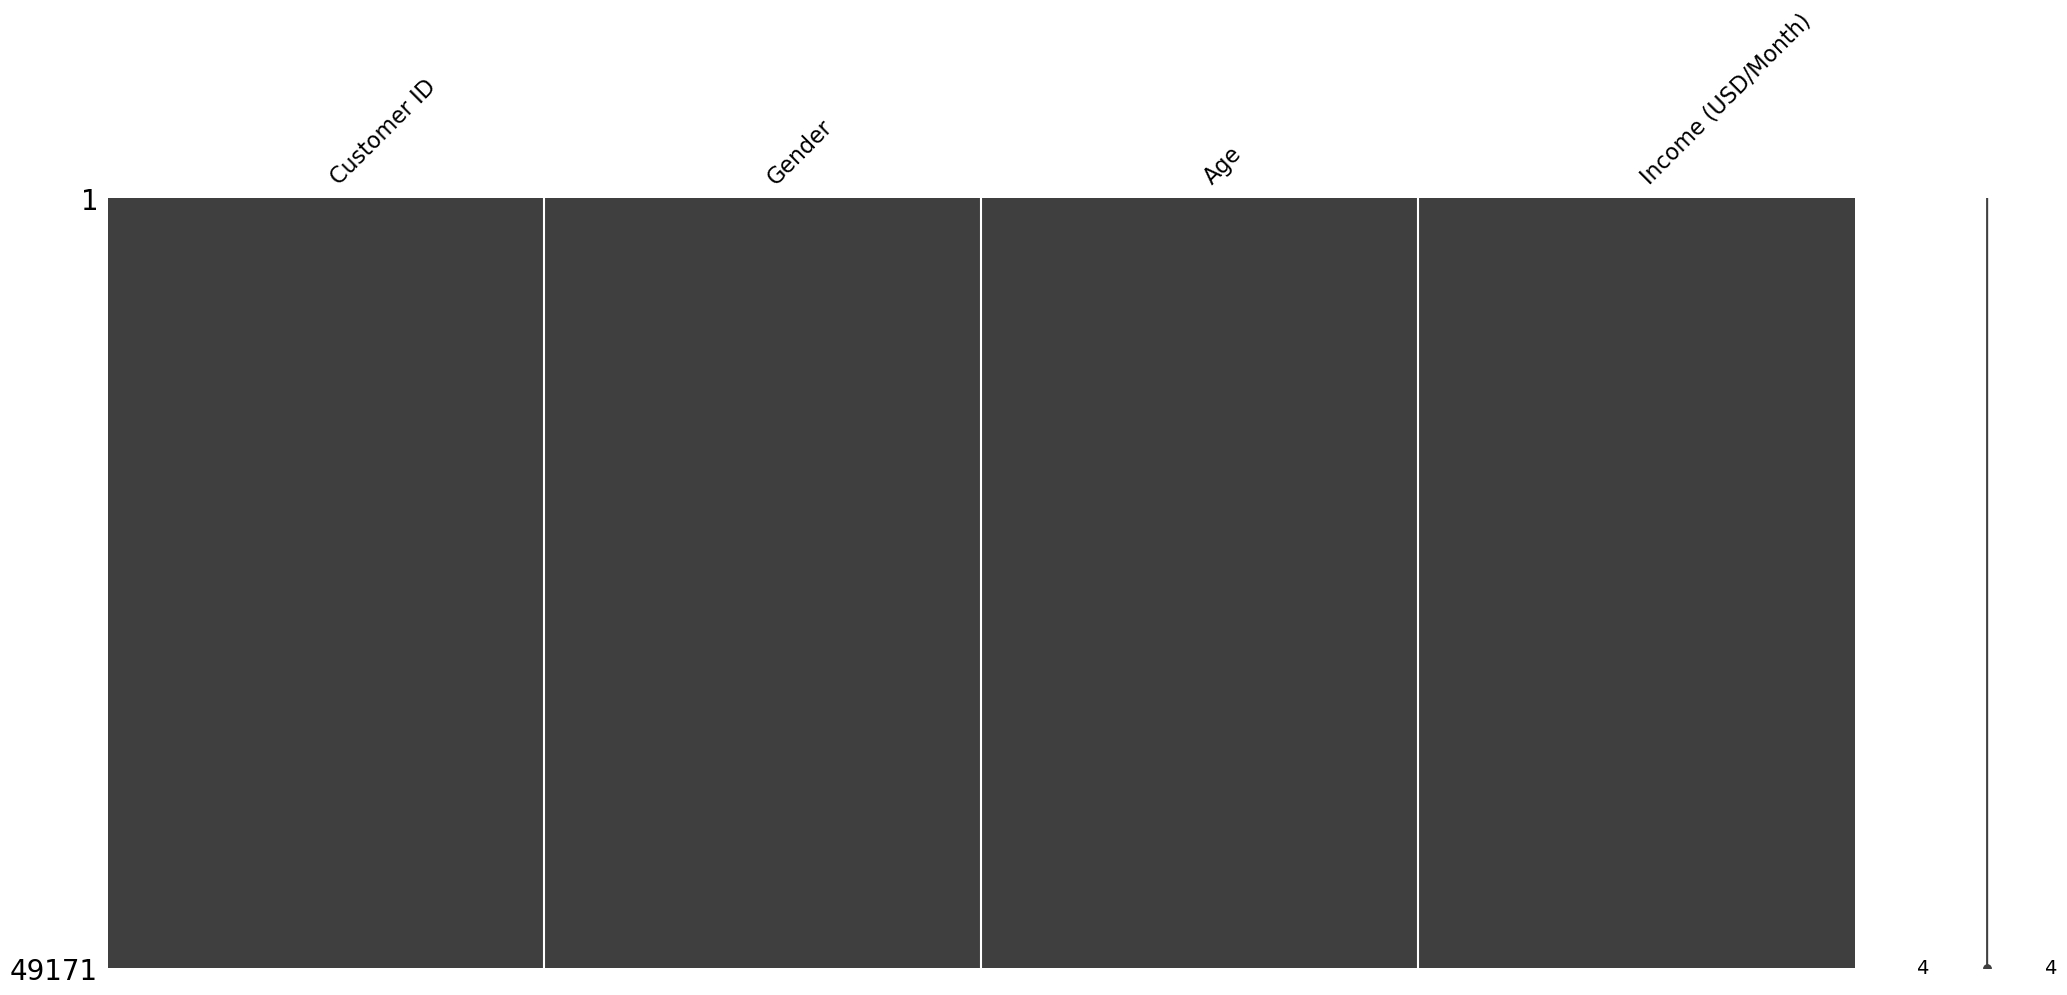

In [12]:
missingno.matrix(customer_id)

In [13]:
transaction_id.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [14]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [15]:
transaction_id.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [16]:
transaction_id.shape

(440098, 3)

<AxesSubplot:>

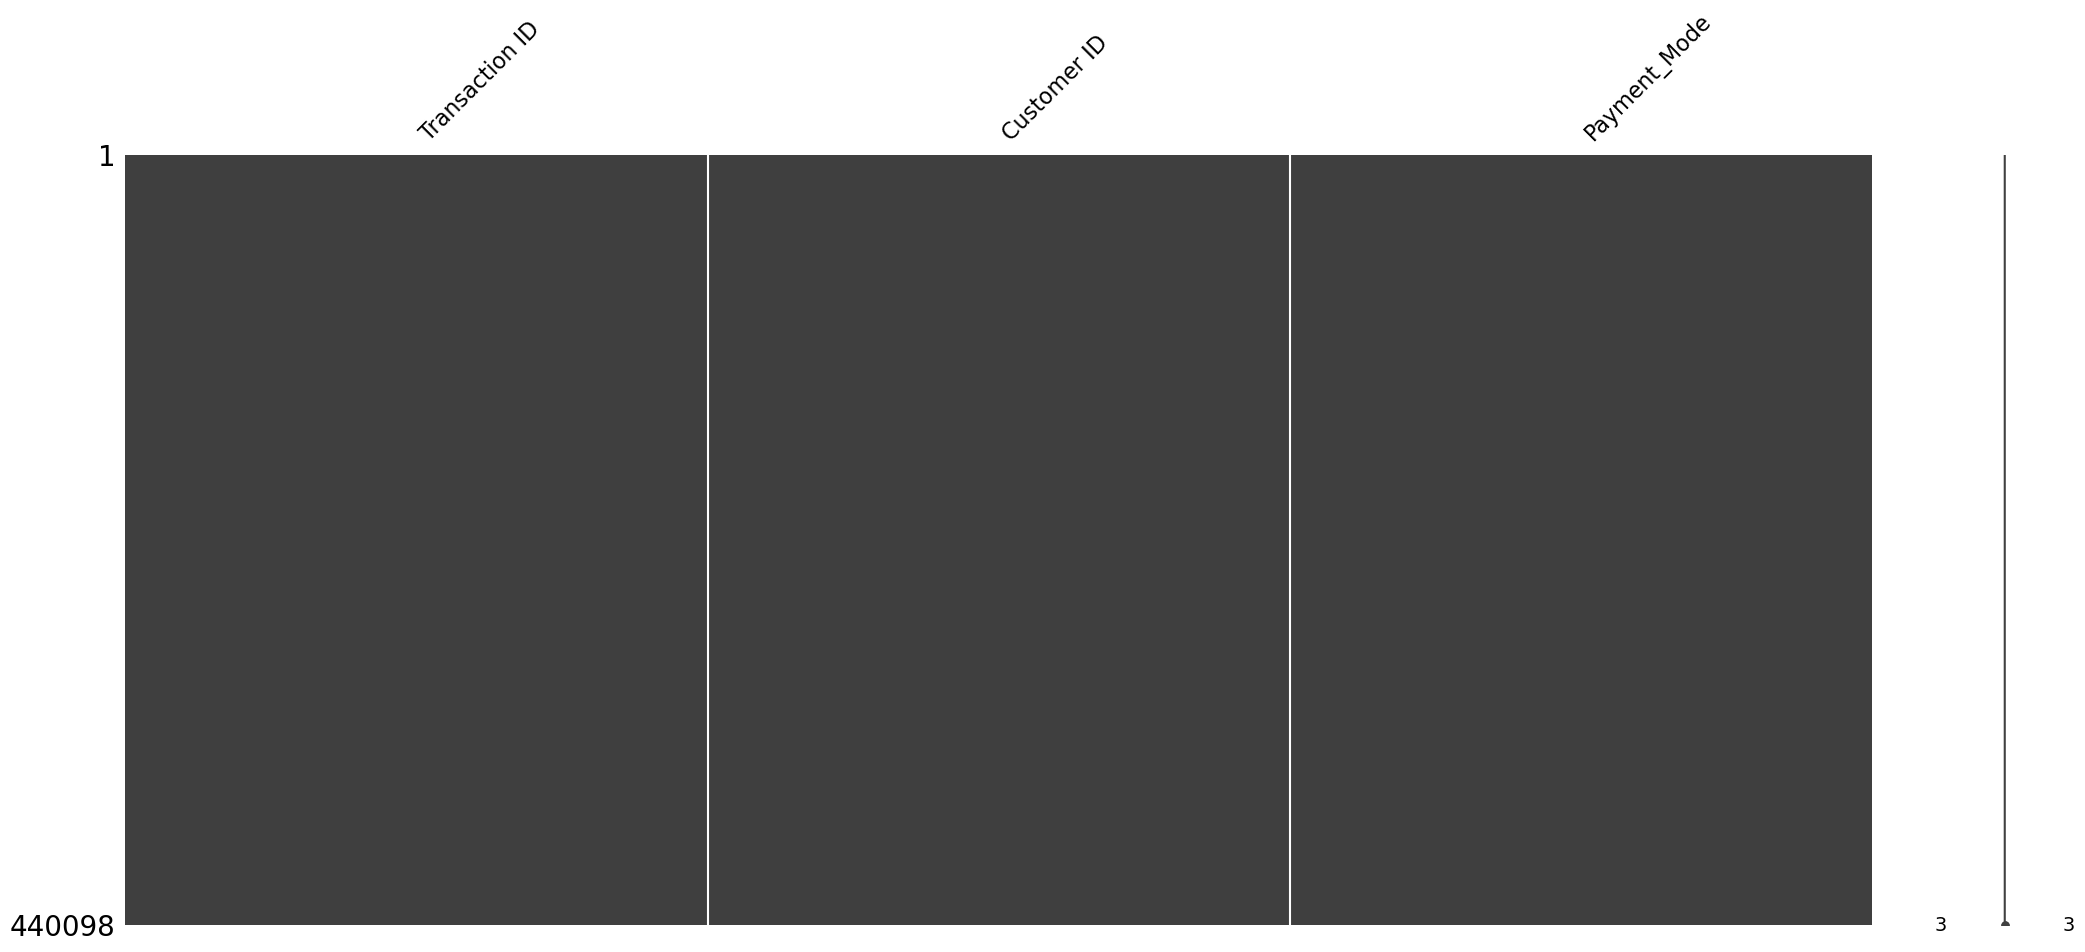

In [17]:
missingno.matrix(transaction_id)

In [18]:
city.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [19]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [20]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [21]:
city.shape

(20, 3)

<AxesSubplot:>

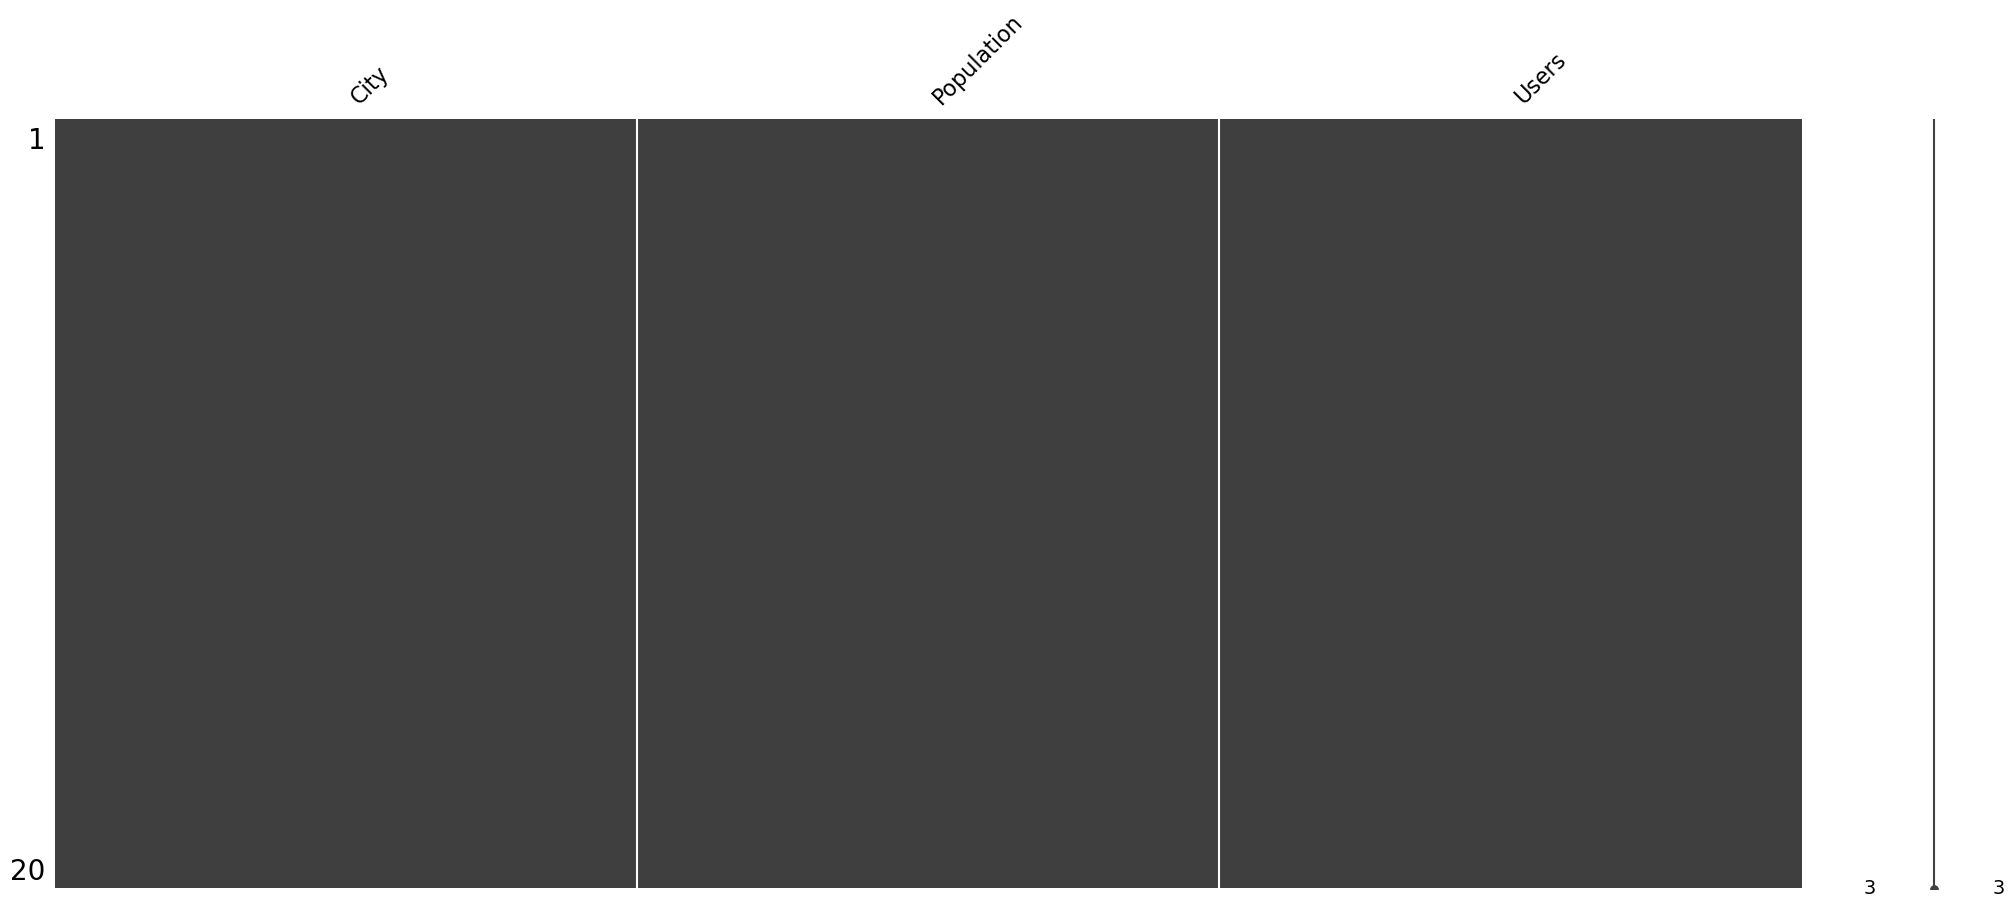

In [22]:
missingno.matrix(city)

In [23]:
cab_data['Date of Travel'].head()

0    42377
1    42375
2    42371
3    42376
4    42372
Name: Date of Travel, dtype: int64

In [24]:
#Date is not in the right format
from datetime import datetime
def handle_date(date):
    convert = datetime.fromordinal(datetime(1900, 1, 30).toordinal() + date - 2).strftime("%d-%m-%Y")
    return datetime.strptime(convert, "%d-%m-%Y")

In [25]:

cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x: handle_date(x))

In [26]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-02-06,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-02-02,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-02-03,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-02-03,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [27]:
customer_id

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [28]:
transaction_id

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [29]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [30]:
#Keeping the copy of the datasets
cab_data_copy = cab_data
customer_id_copy=customer_id
transaction_id_copy=transaction_id
city_copy=city

In [31]:
merged_data = cab_data.merge(transaction_id, on = 'Transaction ID').merge(customer_id, on = 'Customer ID').merge(city, on = 'City')

In [32]:
merged_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-04-01,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,2018-05-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,2018-08-04,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,2018-08-31,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


In [33]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [34]:
merged_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [35]:
#Removing spaces in the column labels 
#Removing commas in Population and Users column of merged_data

for column in merged_data.columns:
    if ' ' in column:
        merged_data = merged_data.rename(columns = {column:column.replace(' ', '_')})
        
for column in ['Population','Users']:
    merged_data[column] = merged_data[column].str.replace(',', '')

In [36]:
merged_data['Profit']=merged_data['Price_Charged']-merged_data['Cost_of_Trip']

In [37]:
merged_data['Year'] = merged_data['Date_of_Travel'].dt.year
merged_data['Month'] = merged_data['Date_of_Travel'].dt.month
merged_data['Day'] = merged_data['Date_of_Travel'].dt.day


In [38]:
merged_data

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit,Year,Month,Day
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,2016,2,6
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,2018,8,19
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,2018,12,22
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,2016,2,4
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,2018,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-04-01,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,143.6180,2018,4,1
359388,10319775,2018-05-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,23.0464,2018,5,12
359389,10347676,2018-08-04,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,-5.8540,2018,8,4
359390,10358624,2018-08-31,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,-6.0900,2018,8,31


In [39]:
#intializing the data type

for column in ["Company", "City", "Payment_Mode", "Gender"]:
    merged_data[column] = merged_data[column].astype('category')

for column in ["Population", "Users"]:
    merged_data[column] = merged_data[column].astype('int64')

In [40]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date_of_Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  category      
 3   City                359392 non-null  category      
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Customer_ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  category      
 9   Gender              359392 non-null  category      
 10  Age                 359392 non-null  int64         
 11  Income_(USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

# Exploratory Data Analysis

Now our Exploratory Data Analysis(EDA) starts. We have merged all four dataset safely without lossing any data with no null vaues

In [41]:
#seperating both companies datasets

pink_cab = merged_data [ merged_data['Company'] == 'Pink Cab']
yellow_cab = merged_data [ merged_data['Company'] == 'Yellow Cab']

In [42]:
pink_cab

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit,Year,Month,Day
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315,2016,2,6
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666,2016,2,4
6,10395626,2018-11-25,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237,814885,24701,25.096,2018,11,25
7,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568,2016,1,31
11,10000014,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798,2016,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359332,10200082,2017-08-21,Pink Cab,WASHINGTON DC,20.23,347.58,218.484,52425,Cash,Male,58,10737,418859,127001,129.096,2017,8,21
359346,10262863,2017-12-18,Pink Cab,WASHINGTON DC,4.44,61.95,50.616,51257,Card,Male,39,15247,418859,127001,11.334,2017,12,18
359356,10417014,2018-12-31,Pink Cab,WASHINGTON DC,40.95,565.07,434.070,51257,Card,Male,39,15247,418859,127001,131.000,2018,12,31
359358,10197277,2017-08-21,Pink Cab,WASHINGTON DC,32.64,375.27,368.832,51510,Card,Female,18,6855,418859,127001,6.438,2017,8,21


In [43]:
pink_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84711 entries, 0 to 359363
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction_ID      84711 non-null  int64         
 1   Date_of_Travel      84711 non-null  datetime64[ns]
 2   Company             84711 non-null  category      
 3   City                84711 non-null  category      
 4   KM_Travelled        84711 non-null  float64       
 5   Price_Charged       84711 non-null  float64       
 6   Cost_of_Trip        84711 non-null  float64       
 7   Customer_ID         84711 non-null  int64         
 8   Payment_Mode        84711 non-null  category      
 9   Gender              84711 non-null  category      
 10  Age                 84711 non-null  int64         
 11  Income_(USD/Month)  84711 non-null  int64         
 12  Population          84711 non-null  int64         
 13  Users               84711 non-null  int64    

In [44]:
yellow_cab

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit,Year,Month,Day
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,2018,8,19
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,2018,12,22
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,2018,5,20
5,10324737,2018-06-02,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701,50.8912,2018,6,2
8,10079404,2016-10-20,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701,210.0920,2016,10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-04-01,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,143.6180,2018,4,1
359388,10319775,2018-05-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,23.0464,2018,5,12
359389,10347676,2018-08-04,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,-5.8540,2018,8,4
359390,10358624,2018-08-31,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,-6.0900,2018,8,31


In [45]:
yellow_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274681 entries, 1 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      274681 non-null  int64         
 1   Date_of_Travel      274681 non-null  datetime64[ns]
 2   Company             274681 non-null  category      
 3   City                274681 non-null  category      
 4   KM_Travelled        274681 non-null  float64       
 5   Price_Charged       274681 non-null  float64       
 6   Cost_of_Trip        274681 non-null  float64       
 7   Customer_ID         274681 non-null  int64         
 8   Payment_Mode        274681 non-null  category      
 9   Gender              274681 non-null  category      
 10  Age                 274681 non-null  int64         
 11  Income_(USD/Month)  274681 non-null  int64         
 12  Population          274681 non-null  int64         
 13  Users               274681 no

Below we can understand some of the important numerical attributes such as KM Travelled, Price Charged, Cost of Trip, Age, Income(USD/Month), Population and Users. These are really crutial data. 
We ignore the Transaction ID and Customer ID here as they are not of any significance at the moment.

In [46]:
selected_columns = ['KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Age', 'Income_(USD/Month)', 'Population', 'Users']
filtered_pink_cab = pink_cab[selected_columns]
filtered_yellow_cab = yellow_cab[selected_columns]

In [47]:
#statistics for pink cab

pink_cab_statistics = filtered_pink_cab.describe()
pink_cab_statistics

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,8.471100e+04,84711.000000
mean,22.559917,310.800856,248.148682,35.322414,15059.047137,2.350642e+06,125590.813330
std,12.231092,181.995661,135.403345,12.644780,7991.077762,2.734890e+06,94593.433659
min,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,12.000000,159.970000,131.868000,25.000000,8371.000000,8.148850e+05,27247.000000
50%,22.440000,298.060000,246.330000,33.000000,14713.000000,1.595037e+06,144132.000000
75%,32.960000,441.505000,360.180000,42.000000,21055.000000,1.955130e+06,164468.000000
max,48.000000,1623.480000,576.000000,65.000000,35000.000000,8.405837e+06,302149.000000


In [48]:
#statistics for yellow cab

yellow_cab_statistics = filtered_yellow_cab.describe()
yellow_cab_statistics

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
count,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,2.746810e+05,274681.000000
mean,22.569517,458.181990,297.922004,35.341112,15045.669817,3.373228e+06,168473.246981
std,12.234298,288.386166,162.548986,12.578625,7962.727062,3.439014e+06,100570.558886
min,1.900000,20.730000,22.800000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,11.990000,226.680000,158.400000,25.000000,8439.000000,6.712380e+05,80021.000000
50%,22.440000,425.060000,295.596000,33.000000,14676.000000,1.595037e+06,144132.000000
75%,32.960000,633.880000,432.432000,42.000000,21023.000000,8.405837e+06,302149.000000
max,48.000000,2048.030000,691.200000,65.000000,34996.000000,8.405837e+06,302149.000000


In [49]:
graph1 = pink_cab.groupby(['Month'])['Transaction_ID'].count()

In [50]:
graph1

Month
1     11298
2      4483
3      3621
4      4097
5      4218
6      4945
7      6099
8      6455
9      7912
10     9944
11    10069
12    11570
Name: Transaction_ID, dtype: int64

In [51]:
graph2 = yellow_cab.groupby(['Month'])['Transaction_ID'].count()

In [52]:
graph2

Month
1     34770
2     16276
3     16052
4     16909
5     17914
6     18430
7     19534
8     20671
9     23853
10    28228
11    28737
12    33307
Name: Transaction_ID, dtype: int64

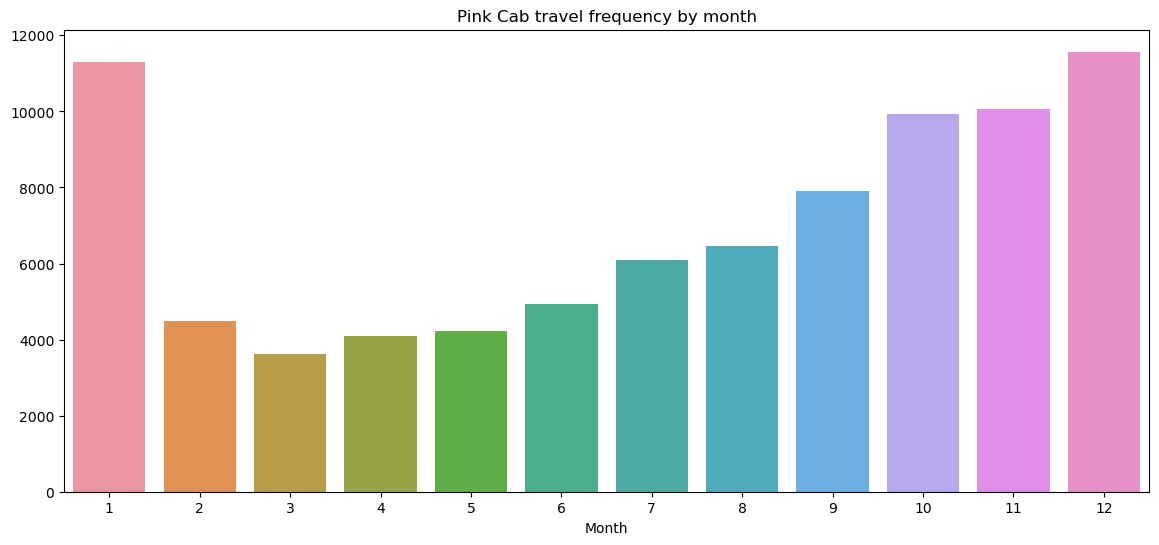

In [53]:

#Transaction frequency by month for Pink cab

plt.figure(figsize=(14,6))
sns.barplot(x = graph1.index, y = graph1.values)
plt.title('Pink Cab travel frequency by month')
plt.show()

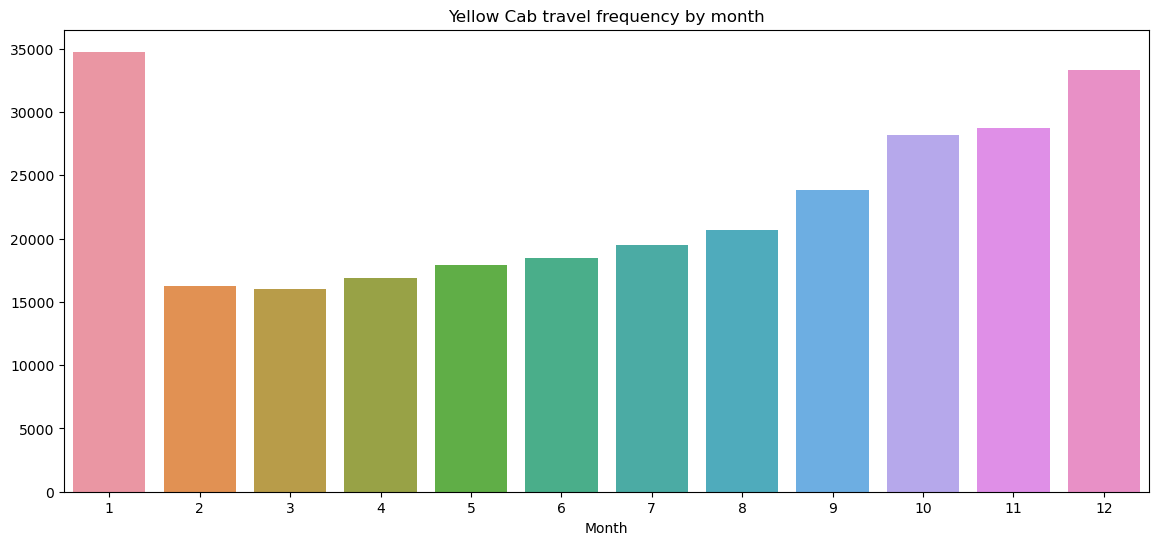

In [54]:
#Transaction frequency by month for yellow cab

plt.figure(figsize=(14,6))
sns.barplot(x = graph2.index, y = graph2.values)
plt.title('Yellow Cab travel frequency by month')
plt.show()

Usage of Cab is more from October to January when compared to rest of the year

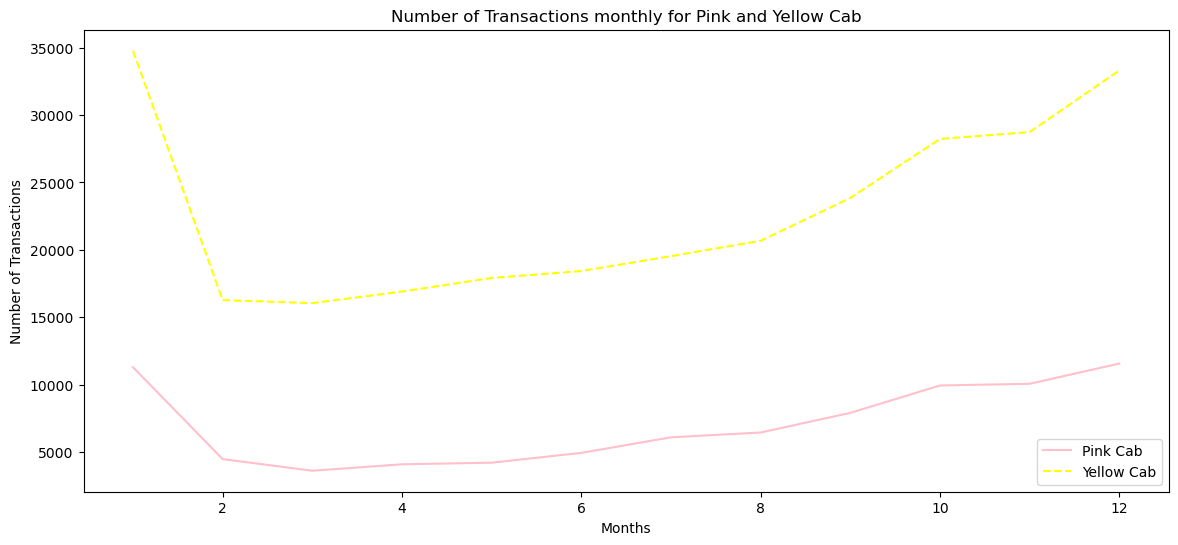

In [55]:
#Comparing both companies' number of transactions

fig, axes = plt.subplots(figsize = (14,6))
axes.plot(graph1.index, graph1.values, color = 'pink', linestyle = '-')
axes.plot(graph2.index, graph2.values, color = 'yellow', linestyle = '--')
#plt.xticks(np.arange(min(graph1.index), max(graph1.index)+1, 1.0))
axes.set_title("Number of Transactions monthly for Pink and Yellow Cab")
plt.xlabel("Months")
plt.ylabel("Number of Transactions")
axes.legend(['Pink Cab', 'Yellow Cab'])

Graph depicts that yellow cab business is good and has transactions 3 times more than pink cab 

In [56]:
graph3 = pink_cab.groupby(['Year'])['Transaction_ID'].count()
graph4 = yellow_cab.groupby(['Year'])['Transaction_ID'].count()

In [57]:
graph3

Year
2016    21734
2017    29750
2018    29730
2019     3497
Name: Transaction_ID, dtype: int64

In [58]:
graph4

Year
2016    71927
2017    96626
2018    95186
2019    10942
Name: Transaction_ID, dtype: int64

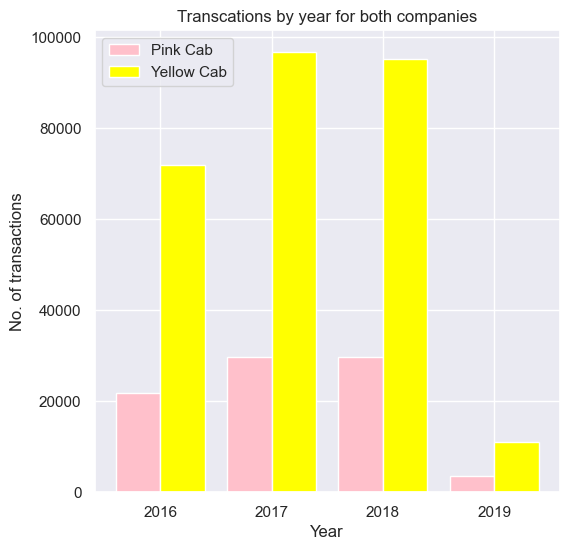

In [135]:
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(graph3.index-0.2, graph3.values, width=0.4, color = 'Pink')
axes.bar(graph4.index+0.2, graph4.values, width=0.4, color = 'Yellow')
plt.ylabel('No. of transactions')
plt.xlabel('Year')
plt.xticks(np.arange(min(graph3.index), max(graph4.index)+1, 1.0))
axes.set_title('Transcations by year for both companies')
axes.legend(['Pink Cab', 'Yellow Cab'])
plt.show()

Graph shows year yellow cab has more transactions in the year 2017 and 2018 

In [65]:
no_of_transactions = merged_data.groupby(['Company']).Transaction_ID.count()
no_of_transactions


Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction_ID, dtype: int64

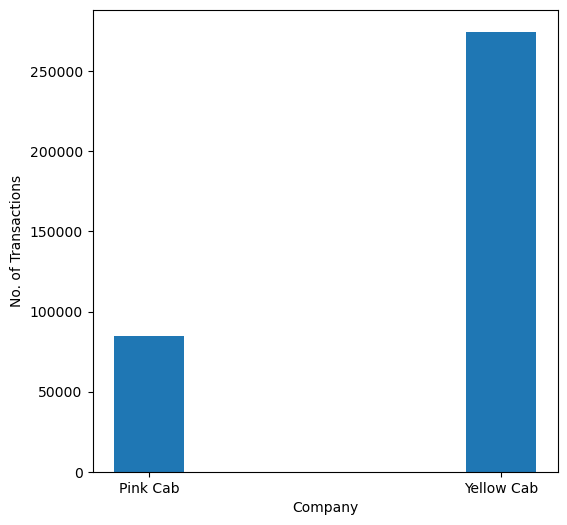

In [66]:
#number of transactions in each company

fig, axes = plt.subplots(figsize = (6,6))
axes.bar(no_of_transactions.index, no_of_transactions.values, width=0.2)
plt.ylabel('No. of Transactions')
plt.xlabel('Company')
plt.legend
plt.show()

Yellow cab is performing better than pink cab

In [61]:
#Users of both Cab companies
users = merged_data.groupby(['Company']).Users.count()
users

Company
Pink Cab       84711
Yellow Cab    274681
Name: Users, dtype: int64

In [62]:
total_users = sum(users)
total_users 

359392

In [63]:
#Percentage of users by population

Percent_of_users = merged_data.groupby(['Company']).Users.count() / total_users * 100
Percent_of_users

Company
Pink Cab      23.570642
Yellow Cab    76.429358
Name: Users, dtype: float64

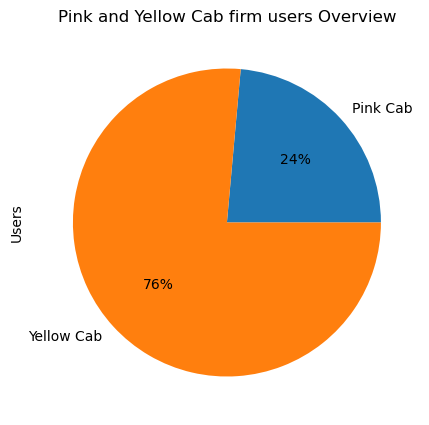

In [64]:
#Pink and Yellow Cab firm users Overview

Percent_of_users.plot.pie(y='Percent_of_users', figsize=(5,5), title = 'Pink and Yellow Cab firm users Overview', autopct='%.0f%%')

plt.show()

75% of cab users prefer yellow cab

In [67]:
#Gender Analysis

pink_gender = pink_cab.groupby(['Gender'])['Transaction_ID'].count()
pink_gender

Gender
Female    37480
Male      47231
Name: Transaction_ID, dtype: int64

In [68]:
yellow_gender = yellow_cab.groupby(['Gender'])['Transaction_ID'].count()
yellow_gender

Gender
Female    116000
Male      158681
Name: Transaction_ID, dtype: int64

In [69]:
gender_df = pd.DataFrame({'Pink Cab': [37480, 47231], 'Yellow Cab': [116000, 158681]}, index = ['Female', 'Male'])
gender_df

,Pink Cab,Yellow Cab
Female,37480,116000
Male,47231,158681


C:\Users\Shreya\AppData\Local\Temp\ipykernel_9648\1885396313.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  gender_df.plot.bar(y = {'Pink Cab', 'Yellow Cab'}, rot = 0, color = {'Pink Cab': 'pink', 'Yellow Cab': 'yellow'})


<AxesSubplot:>

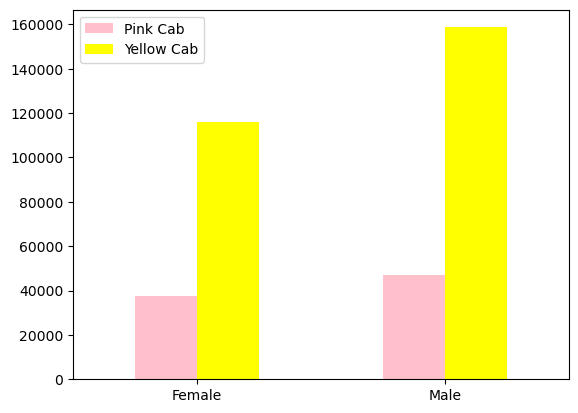

In [70]:
#Comparing number of users bifurcating by Gender for both companies

gender_df.plot.bar(y = {'Pink Cab', 'Yellow Cab'}, rot = 0, color = {'Pink Cab': 'pink', 'Yellow Cab': 'yellow'})

Number of male users are approximately 15% more than female in both the companies

In [71]:
city1 = pink_cab.groupby(['City']).Users.count()
city1 

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Users, dtype: int64

In [72]:
city2 = yellow_cab.groupby(['City']).Users.count()
city2

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Users, dtype: int64

In [73]:
users_df = pd.merge(city1, city2, on = 'City')
users_df 

,Users_x,Users_y
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


In [96]:
#Analysis_City 
city = merged_data.groupby('City')['Transaction_ID'].count().sort_values(ascending=False)
city

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: Transaction_ID, dtype: int64

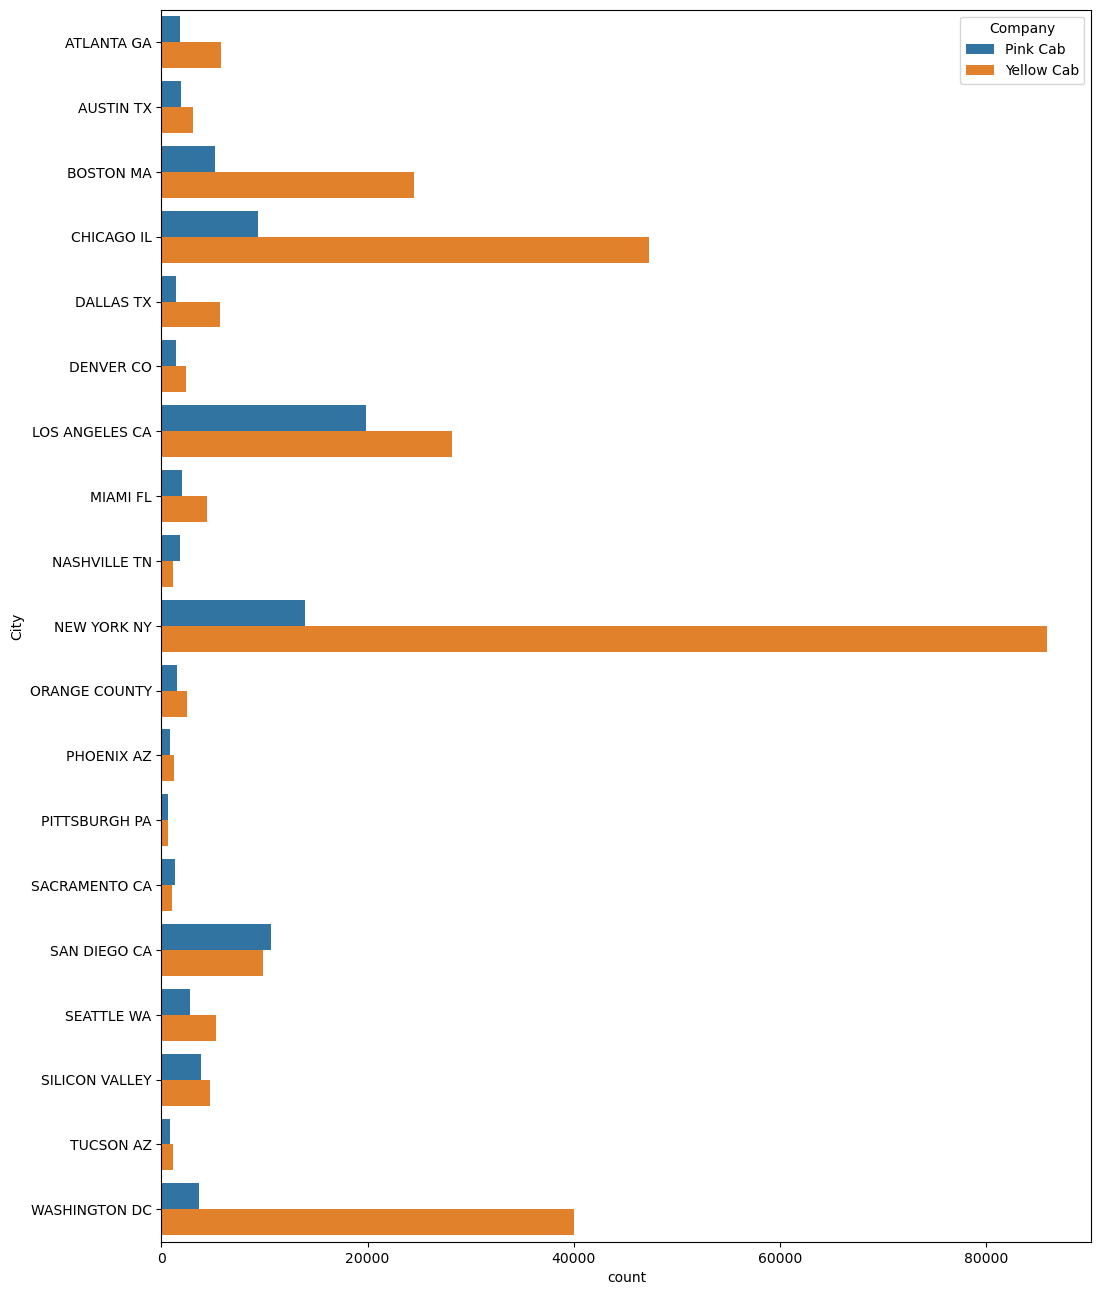

In [74]:

f, ax = plt.subplots(figsize=(12, 16))
# sns.set(style="darkgrid")
ax = sns.countplot(y='City', hue='Company', data=merged_data)
plt.show()

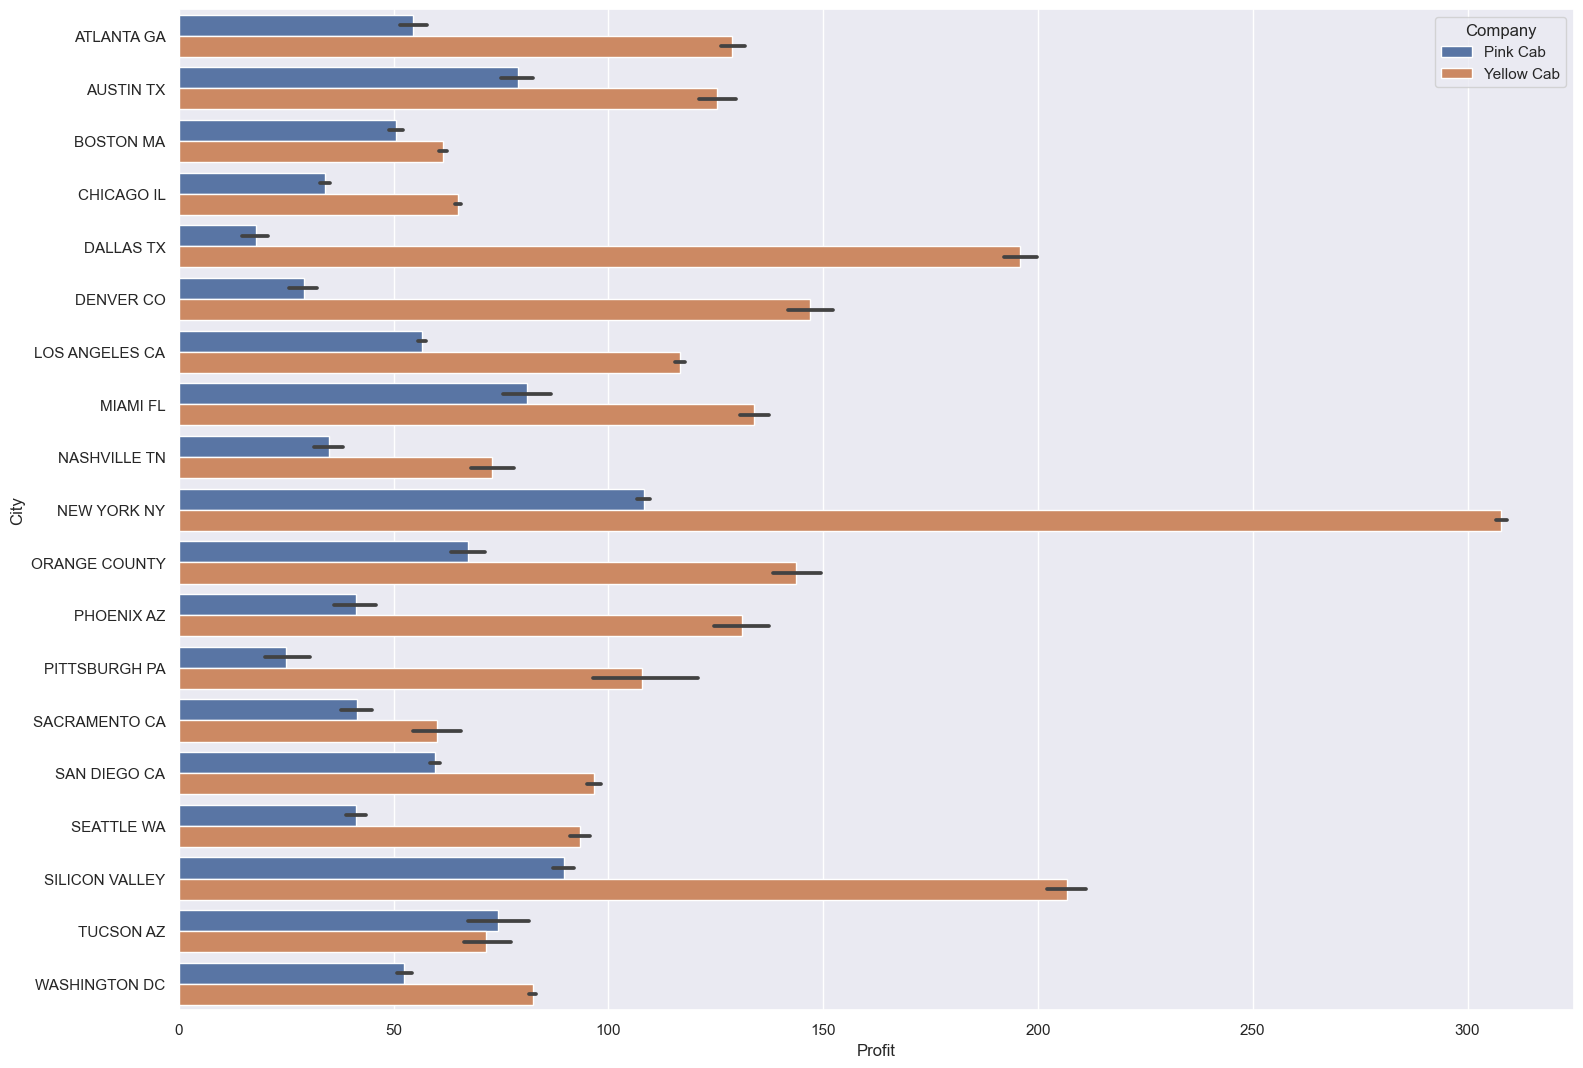

In [99]:
sns.set(rc={'figure.figsize':(18, 13)})
ax = sns.barplot(x="Profit", y="City", data=merged_data, hue='Company')

In [144]:
pink_profit = pink_cab.groupby(['City']).Profit.mean().sort_values(ascending=False)
pink_profit

City
NEW YORK NY       108.217540
SILICON VALLEY     89.610358
MIAMI FL           81.069526
AUSTIN TX          78.932168
TUCSON AZ          74.204725
ORANGE COUNTY      67.412976
SAN DIEGO CA       59.772280
LOS ANGELES CA     56.669120
ATLANTA GA         54.511961
WASHINGTON DC      52.482761
BOSTON MA          50.520960
SACRAMENTO CA      41.472273
SEATTLE WA         41.281601
PHOENIX AZ         41.199530
NASHVILLE TN       34.918269
CHICAGO IL         34.047910
DENVER CO          29.114016
PITTSBURGH PA      25.084660
DALLAS TX          17.920371
Name: Profit, dtype: float64

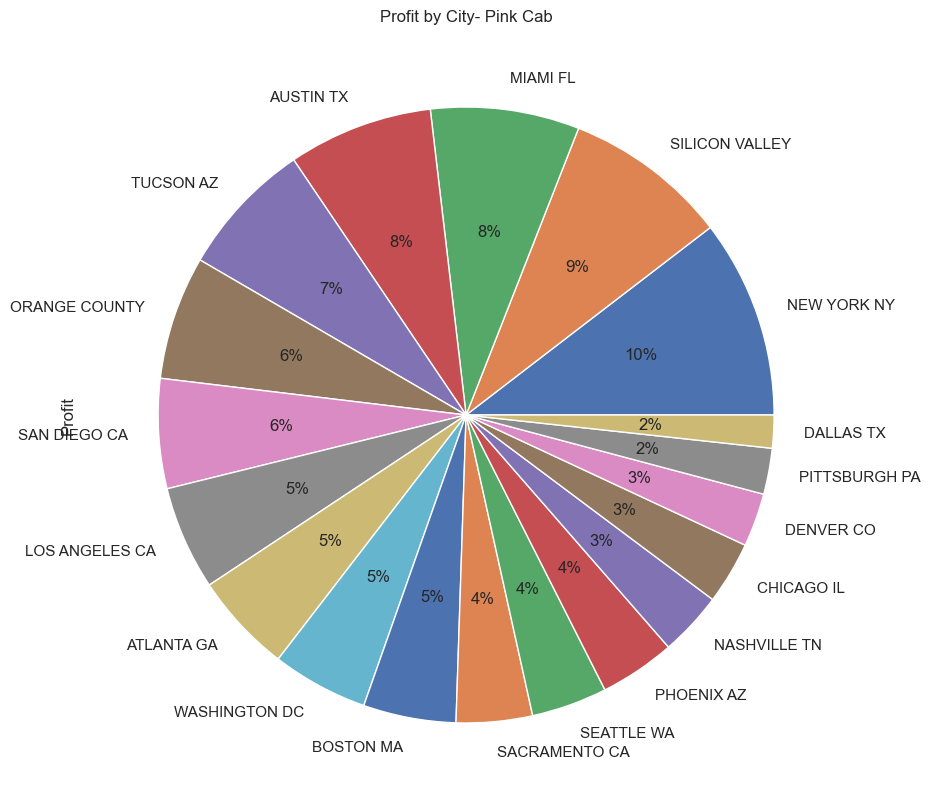

In [145]:

pink_profit.plot.pie(y= 'City', figsize=(10,10), title = 'Profit by City- Pink Cab', autopct='%.0f%%')
plt.show() 

In [146]:
yellow_profit = yellow_cab.groupby(['City']).Profit.mean().sort_values(ascending=False)
yellow_profit

City
NEW YORK NY       307.864252
SILICON VALLEY    206.788383
DALLAS TX         195.849415
DENVER CO         146.853175
ORANGE COUNTY     143.785355
MIAMI FL          133.872429
PHOENIX AZ        131.120407
ATLANTA GA        128.797723
AUSTIN TX         125.249582
LOS ANGELES CA    116.656368
PITTSBURGH PA     107.857716
SAN DIEGO CA       96.706775
SEATTLE WA         93.428968
WASHINGTON DC      82.384912
NASHVILLE TN       72.923597
TUCSON AZ          71.529258
CHICAGO IL         64.924486
BOSTON MA          61.483619
SACRAMENTO CA      60.021471
Name: Profit, dtype: float64

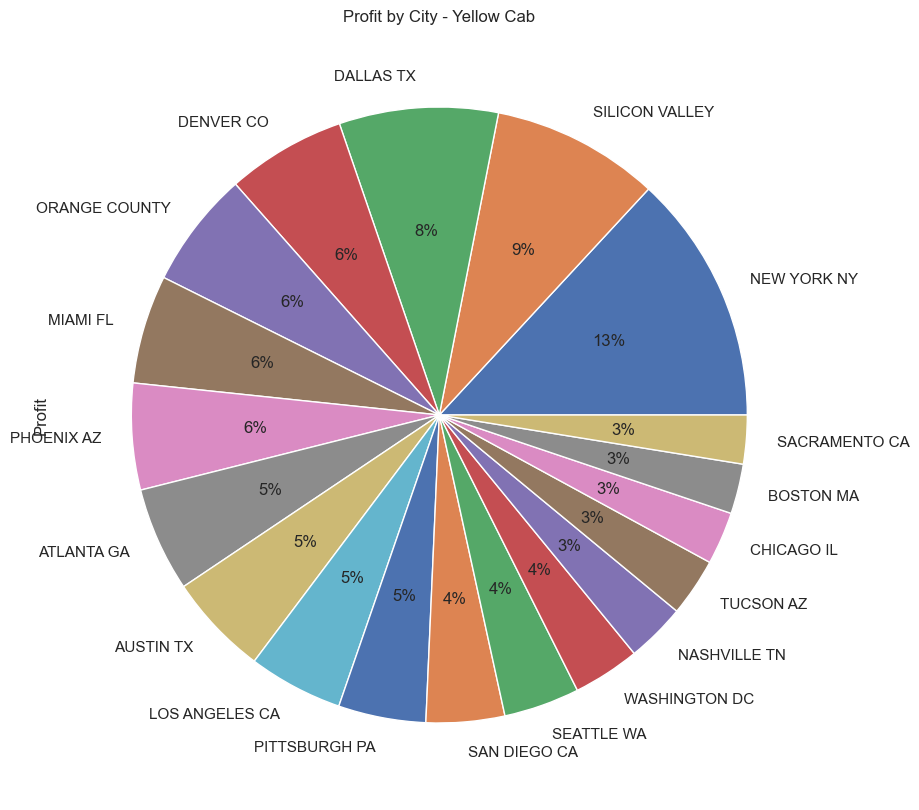

In [147]:
yellow_profit.plot.pie(y= 'City', figsize=(10,10), title = 'Profit by City - Yellow Cab', autopct='%.0f%%')
plt.show() 

The yellow cab users are more in metropolitan city such as New York, Chicago, Los Angeles, and Washington

In [93]:

merged_data.groupby('Company')['Income_(USD/Month)'].mean()


Company
Pink Cab      15059.047137
Yellow Cab    15045.669817
Name: Income_(USD/Month), dtype: float64

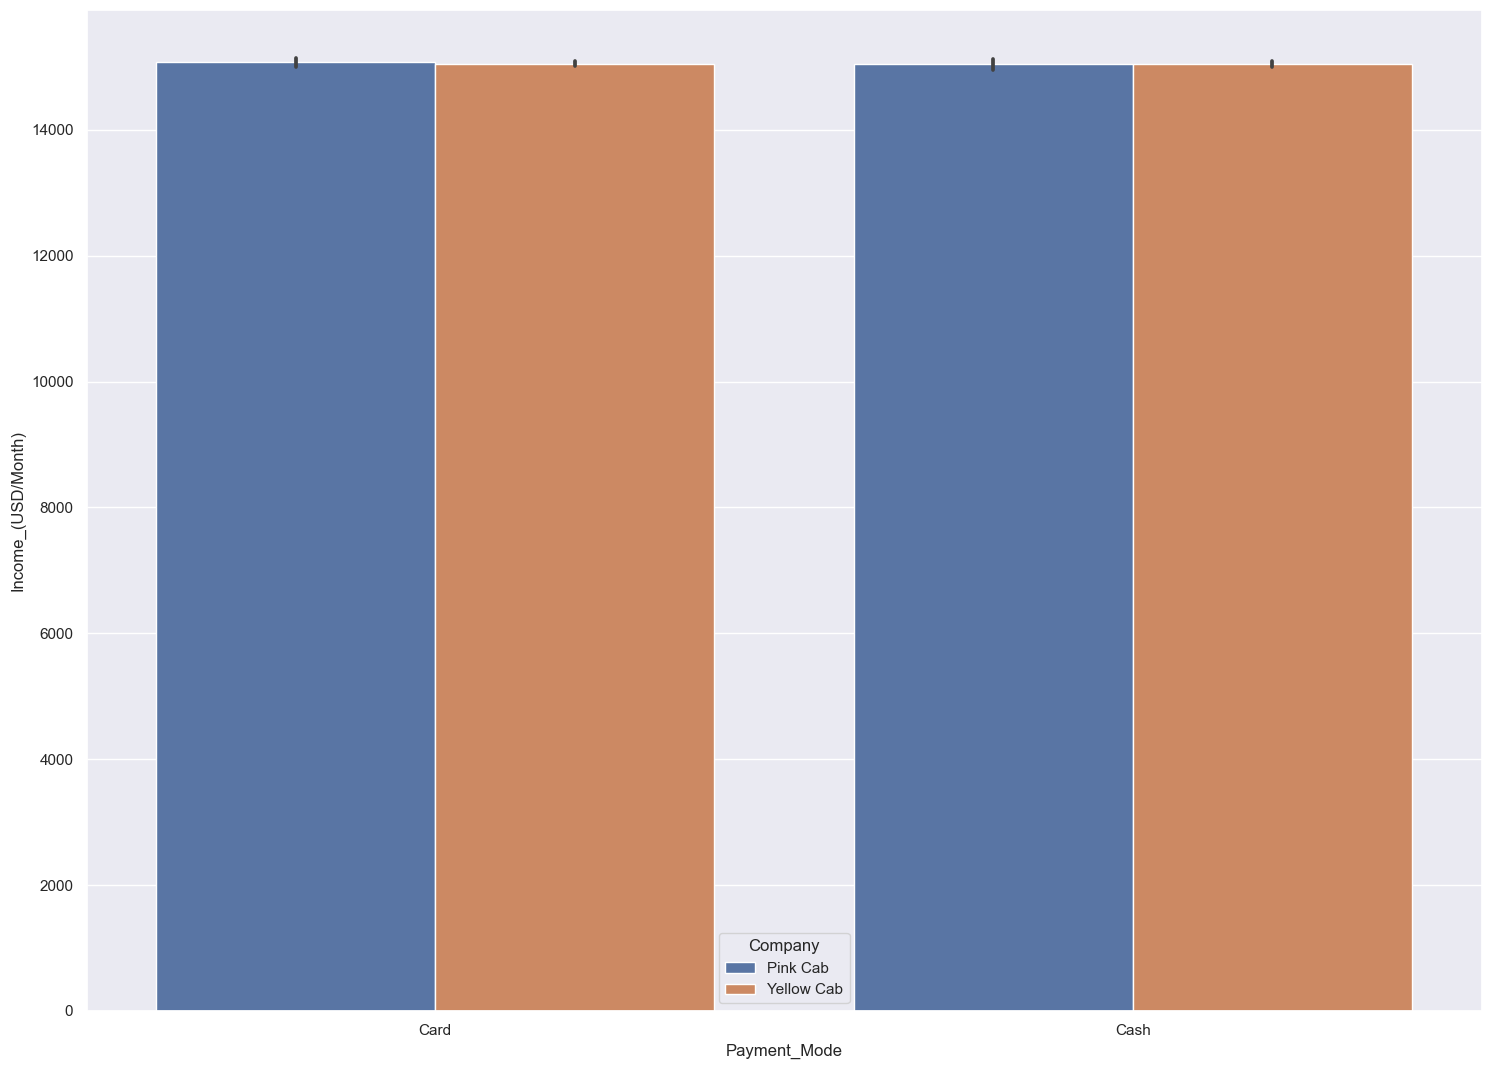

In [101]:
#Payment Mode Analysis
ax = sns.barplot(x="Payment_Mode", y="Income_(USD/Month)", data=merged_data, hue='Company')

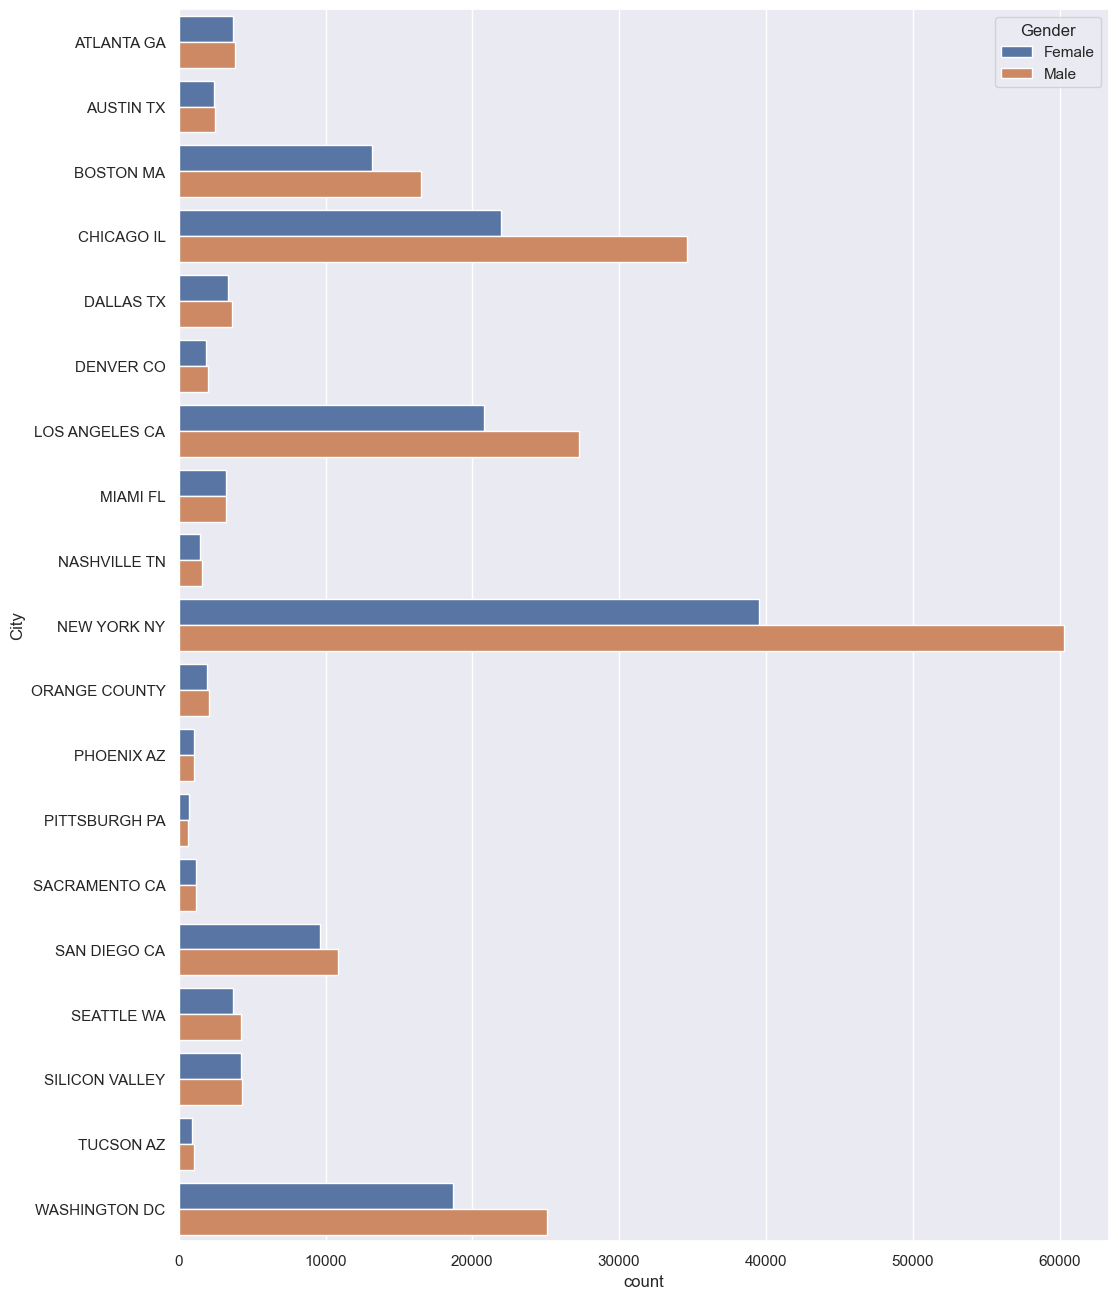

In [124]:

f, ax = plt.subplots(figsize=(12, 16))
# sns.set(style="darkgrid")
ax = sns.countplot(y='City', hue='Gender', data=merged_data)
plt.show()

In suburb both the male and female users ratio is almost the same whereas in metropolitan areas male users are more

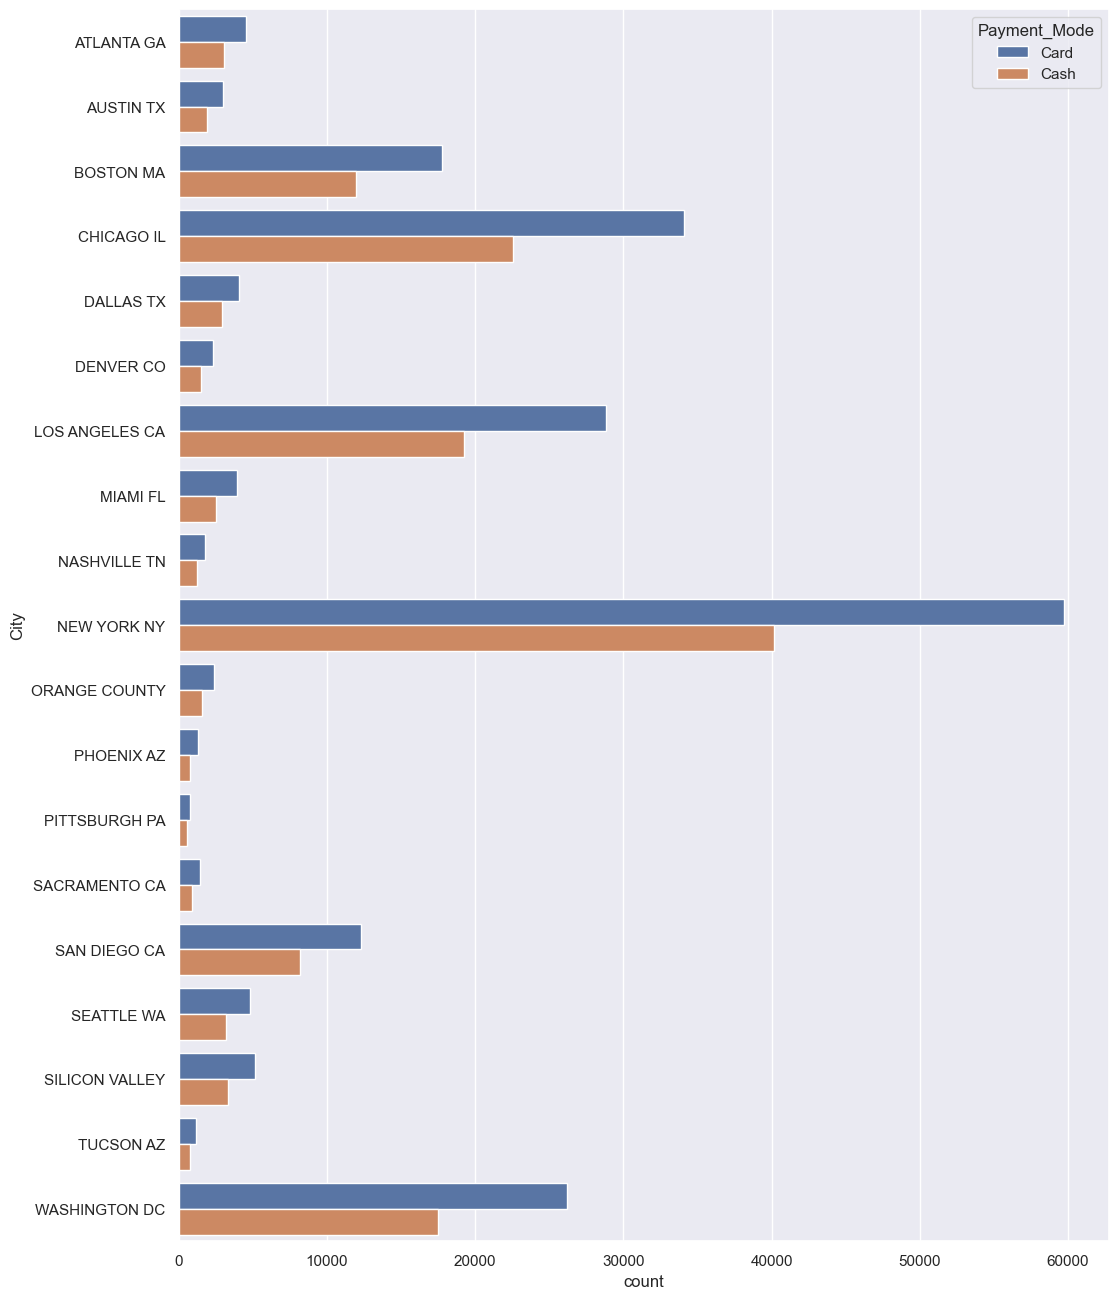

In [126]:

f, ax = plt.subplots(figsize=(12, 16))
# sns.set(style="darkgrid")
ax = sns.countplot(y='City', hue='Payment_Mode', data=merged_data)
plt.show()

Card payment is more convenient and most used by the users than paying by cash 

In [116]:

#Getting companies' average profit
avg=merged_data.groupby(['Company']).Profit.mean()
avg

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64

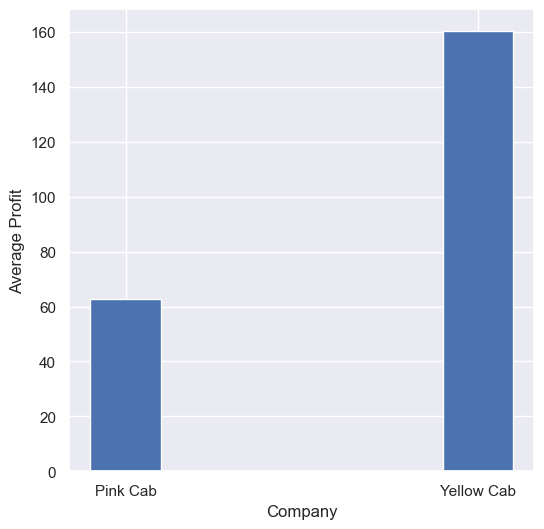

In [117]:
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(avg.index, avg.values, width=0.2)
plt.ylabel('Average Profit')
plt.xlabel('Company')
axes.legend
plt.show()


Average profit for yellow cab company is 2.6 times higher than average profit for pink cab company.

In [103]:
Profit1 = merged_data[merged_data.Company=='Pink Cab'].groupby('Year').Profit.mean()
Profit2 = merged_data[merged_data.Company=='Yellow Cab'].groupby('Year').Profit.mean()

In [138]:
Profit1

Year
2016    63.864163
2017    66.459466
2018    56.538648
2019    74.704456
Name: Profit, dtype: float64

In [139]:
Profit2

Year
2016    171.379921
2017    169.083129
2018    145.837970
2019    134.707558
Name: Profit, dtype: float64

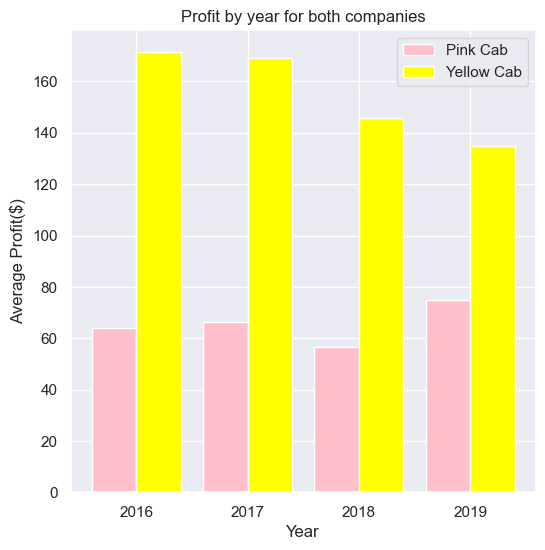

In [140]:
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(Profit1.index-0.2, Profit1.values, width=0.4, color = 'Pink')
axes.bar(Profit2.index+0.2, Profit2.values, width=0.4, color = 'Yellow')
plt.ylabel('Average Profit($)')
plt.xlabel('Year')
plt.xticks(np.arange(min(Profit2.index), max(Profit2.index)+1, 1.0))
axes.set_title('Profit by year for both companies')
axes.legend(['Pink Cab', 'Yellow Cab'])
plt.show()

Average profit for both the companies is declining from the year 2016 to 2018. 
Average profit of the Yellow company is nearby 2.5 times higher in all the years than Pink cab.

In [152]:

ageGroup_Young  = pink_cab[(pink_cab ["Age"] >= 18) & (pink_cab ["Age"] < 25)].count()
ageGroup_Middle = pink_cab[(pink_cab ["Age"] >= 25) & (pink_cab ["Age"] < 40)].count()
ageGroup_Old    = pink_cab[(pink_cab ["Age"] >= 40) & (pink_cab["Age"] <= 65)].count()

dict = {"Young" : ageGroup_Young, "Middle aged" : ageGroup_Middle, "Old aged" : ageGroup_Old}
bar_chart = pd.DataFrame(dict).T
bar_chart = pd.DataFrame(bar_chart["Users"])
bar_chart


,Users
Young,19306
Middle aged,40069
Old aged,25336


In [151]:
AgeGroup_Young  = yellow_cab[(yellow_cab ["Age"] >= 18) & (yellow_cab ["Age"] < 25)].count()
AgeGroup_Middle = yellow_cab[(yellow_cab ["Age"] >= 25) & (yellow_cab ["Age"] < 40)].count()
AgeGroup_Old    = yellow_cab[(yellow_cab ["Age"] >= 40) & (yellow_cab ["Age"] <= 65)].count()

dict = {"Young" : AgeGroup_Young, "Middle aged" : AgeGroup_Middle, "Old aged" : AgeGroup_Old}
bar_chart2 = pd.DataFrame(dict).T
bar_chart2 = pd.DataFrame(bar_chart2["Users"])
bar_chart2

,Users
Young,62065
Middle aged,130162
Old aged,82454


In [154]:
age_df = pd.merge(bar_chart, bar_chart2, on = bar_chart.index)
age_df.rename(columns = {'Users_x' : 'Pink Cab', 'Users_y' : 'Yellow Cab'}, inplace = True)
age_df = age_df.set_index('key_0')
age_df

,Pink Cab,Yellow Cab
key_0,,
Young,19306,62065
Middle aged,40069,130162
Old aged,25336,82454


C:\Users\Shreya\AppData\Local\Temp\ipykernel_9648\3364201133.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  age_df.plot.bar(y = {'Pink Cab', 'Yellow Cab'}, rot = 0, color = {'Pink Cab': 'pink', 'Yellow Cab': 'yellow'},


<AxesSubplot:xlabel='Age Groups', ylabel='Users'>

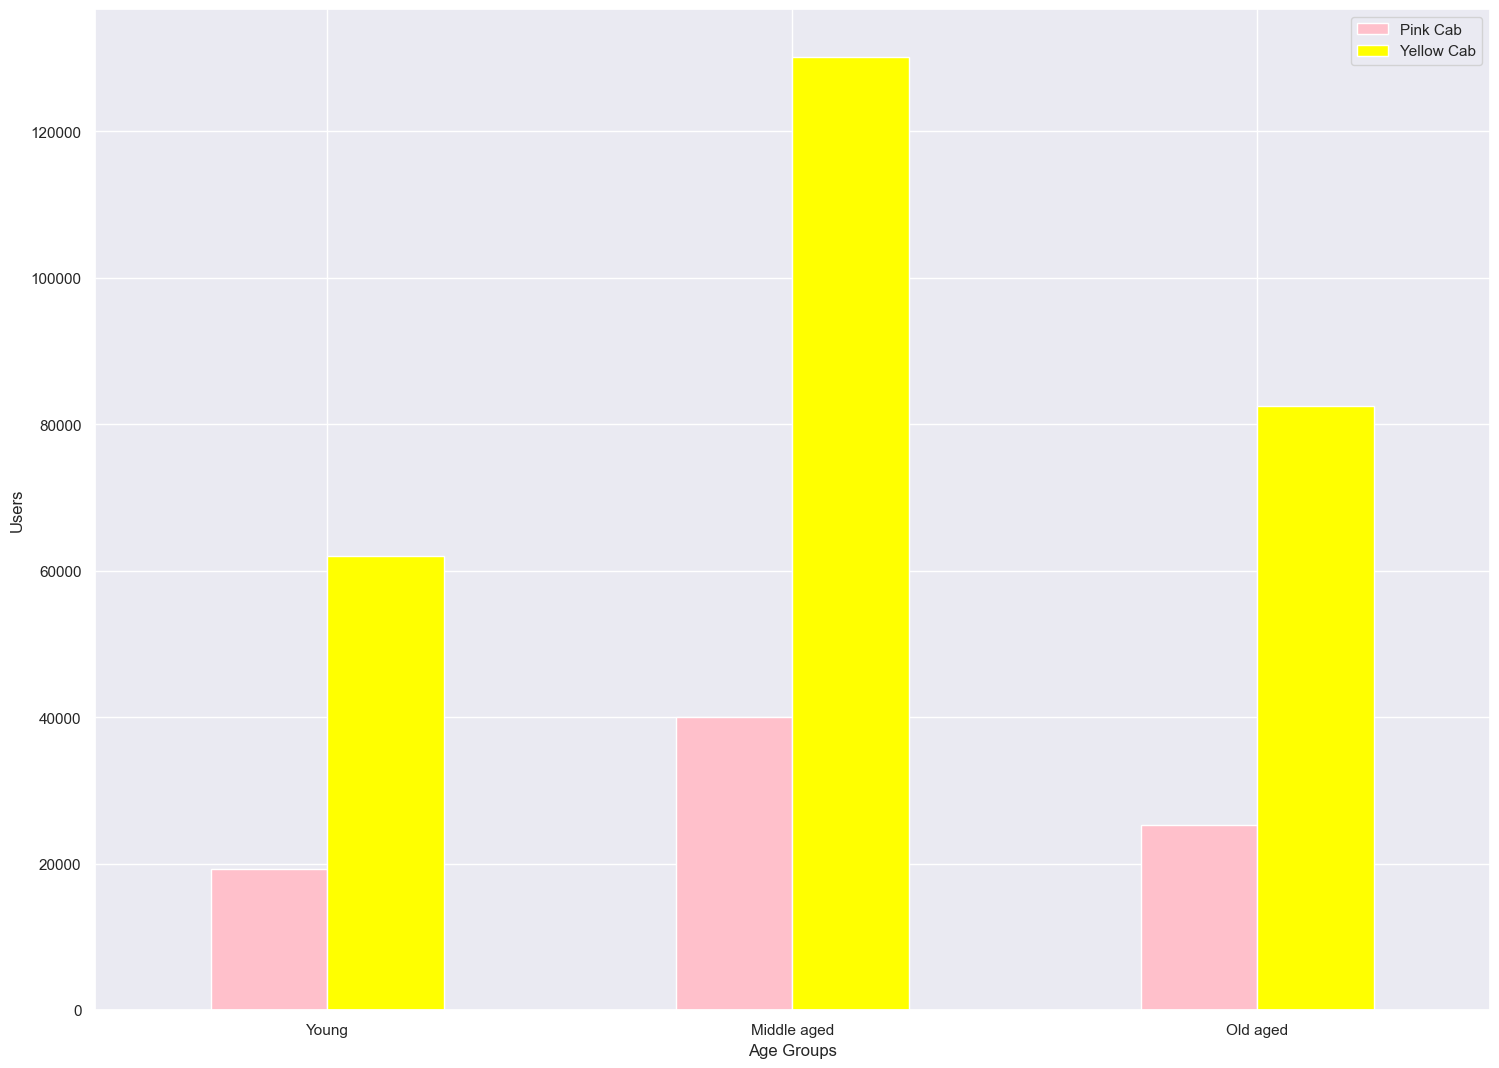

In [155]:
age_df.plot.bar(y = {'Pink Cab', 'Yellow Cab'}, rot = 0, color = {'Pink Cab': 'pink', 'Yellow Cab': 'yellow'},
                xlabel = 'Age Groups', ylabel = 'Users')

Middle aged groups people are more likely to book a cab and yellow cab is most preferred by all the age groups

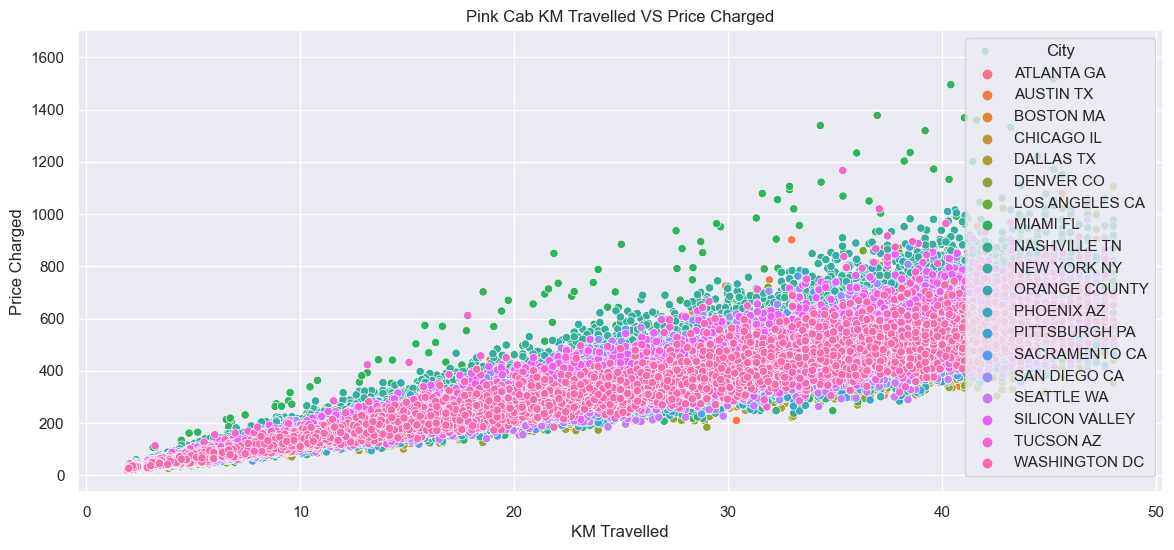

In [118]:
#Comparing KM Travelled with Price that was charged for Pink Cab company

fig, axes = plt.subplots(figsize = (14,6))
sns.scatterplot(x = pink_cab['KM_Travelled'], y = pink_cab['Price_Charged'], hue = pink_cab['City'])
plt.ylabel('Price Charged')
plt.xlabel('KM Travelled')
axes.set_title("Pink Cab KM Travelled VS Price Charged")
plt.show()


For same distance travelled, prices are higher in metropolitan cities as compared to suburb areas.

E:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


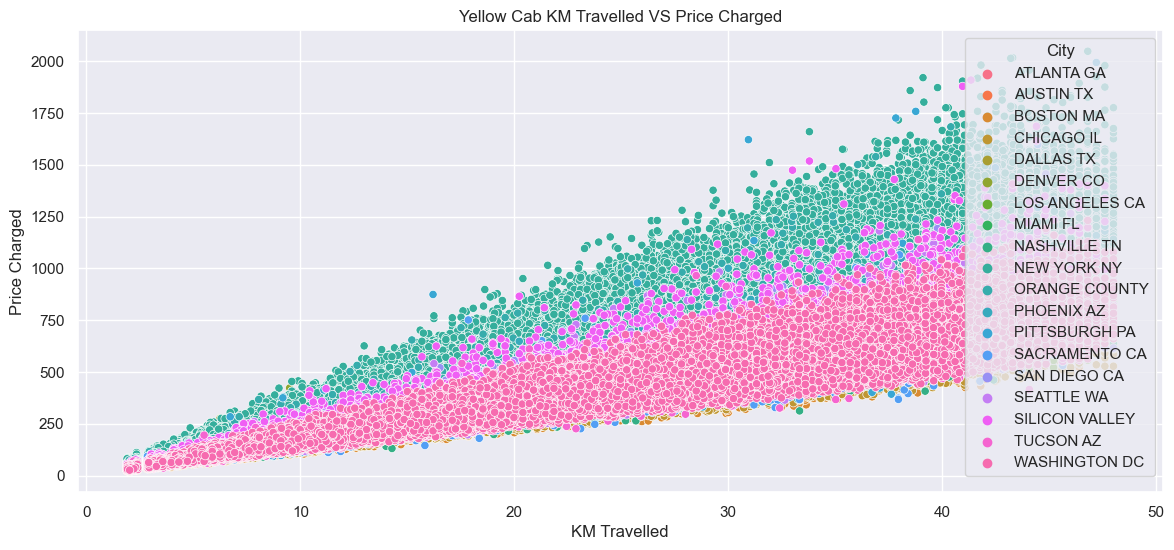

In [119]:

#Comparing KM Travelled with Price that was charged for Yellow Cab company

fig, axes = plt.subplots(figsize = (14,6))
sns.scatterplot(x = yellow_cab['KM_Travelled'], y = yellow_cab['Price_Charged'], hue = yellow_cab['City'])
plt.ylabel('Price Charged')
plt.xlabel('KM Travelled')
axes.set_title("Yellow Cab KM Travelled VS Price Charged")
plt.legend
plt.show()


For same distance travelled, prices are higher in metropolitan cities as compared to suburb areas. 
Yellow cab charges more in suburban areas too than Pink cab.

In [131]:
#Correlation chart for numerical values

plot_f = merged_data[['KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Income_(USD/Month)', 'Profit']]
plot_f.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Income_(USD/Month),Profit
KM_Travelled,1.000000,0.835753,0.981848,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.000633,0.486056
Income_(USD/Month),-0.000544,0.003228,-0.000633,1.000000,0.006148
Profit,0.462768,0.864154,0.486056,0.006148,1.000000


<AxesSubplot:>

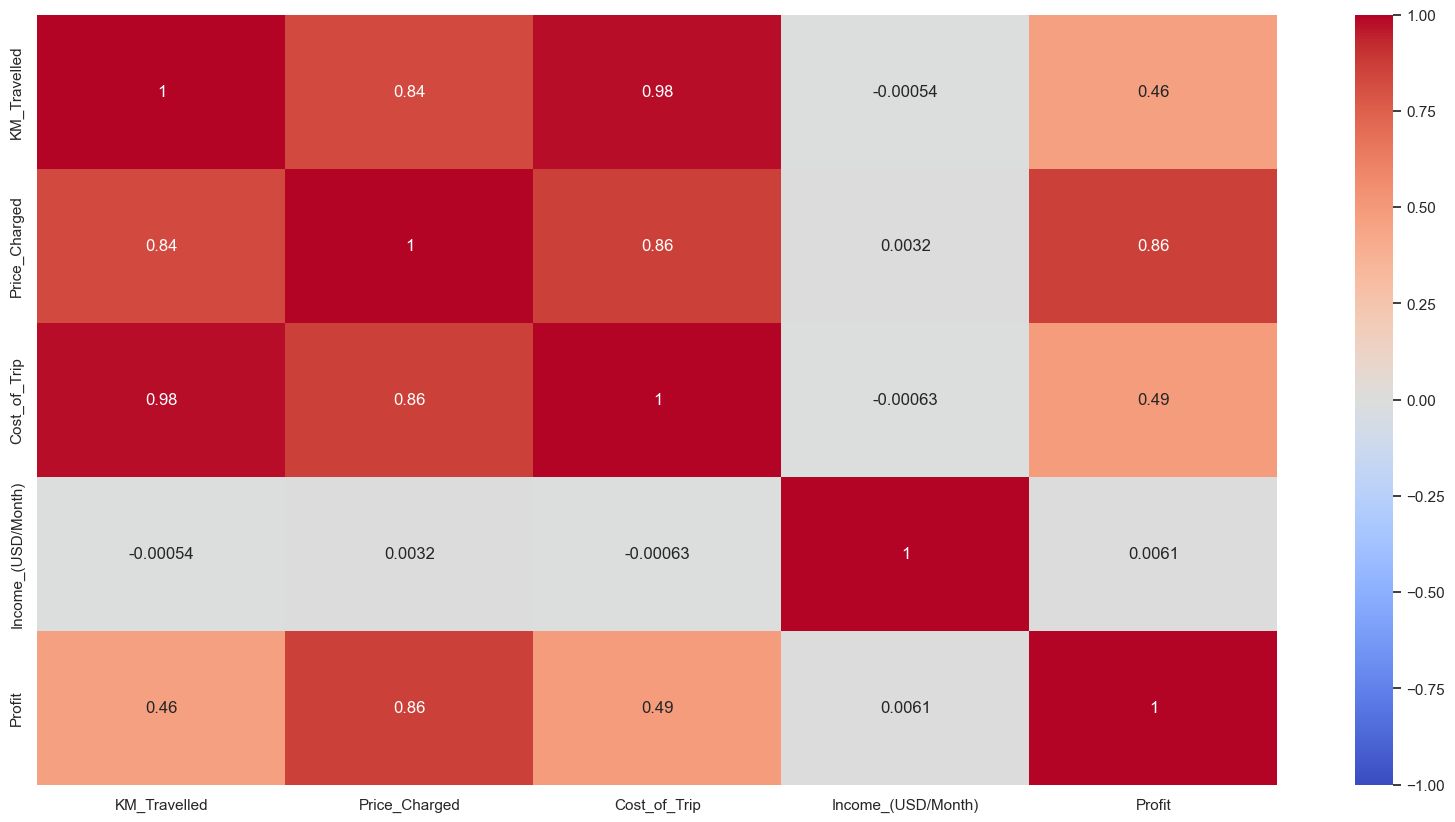

In [132]:
#Heatmap for core values

plt.figure(figsize=(20,10))
sns.heatmap(plot_f.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

Cost of Trip is highly related to KMs Travelled. Profit is partially proportionated to KMs Travelled.